<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Algorithmic Trading

**Chapter 04 &mdash; Vectorized Backtesting**

## Strategies based on Mean-Reversion

### Getting into the Basics

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# data from http://hilpisch.com/pyalgo_eikon_eod_data.csv
raw = pd.read_csv('../input/pyalgo_eikon_eod_data.csv', index_col=0, parse_dates=True).dropna()

In [3]:
data = pd.DataFrame(raw['GDX'])

In [4]:
data.rename(columns={'GDX': 'price'}, inplace=True)

In [5]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

In [6]:
SMA = 25

In [7]:
data['SMA'] = data['price'].rolling(SMA).mean()

In [8]:
threshold = 3.5

In [9]:
data['distance'] = data['price'] - data['SMA']

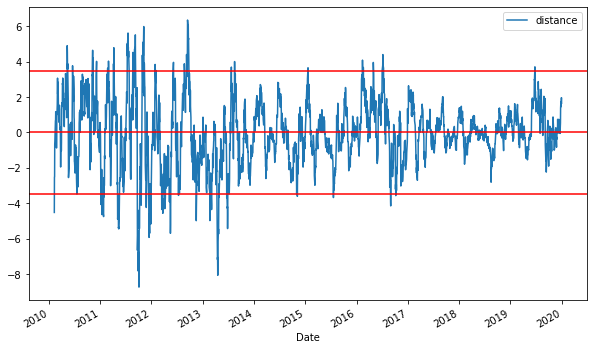

In [10]:
data['distance'].dropna().plot(figsize=(10, 6), legend=True)

plt.axhline(threshold, color='r')
plt.axhline(-threshold, color='r')
plt.axhline(0, color='r');
# plt.savefig('../../images/ch04/mr_plot_1.png')

In [11]:
data['position'] = np.where(data['distance'] > threshold, -1, np.nan)

In [12]:
data['position'] = np.where(data['distance'] < -threshold, 1, data['position'])

In [13]:
data['position'] = np.where(data['distance'] * data['distance'].shift(1) < 0, 0, data['position'])

In [14]:
data['position'] = data['position'].ffill().fillna(0)

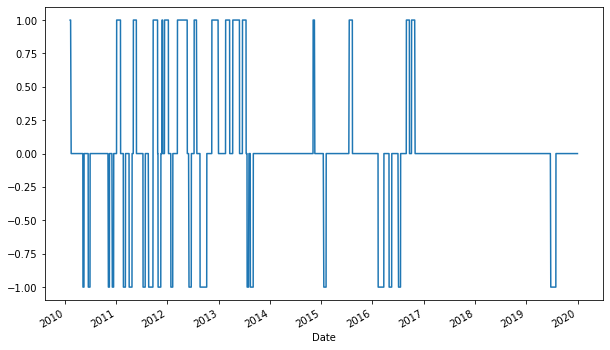

In [15]:
data['position'].iloc[SMA:].plot(ylim=[-1.1, 1.1], figsize=(10, 6));
# plt.savefig('../../images/ch04/mr_plot_2.png')

In [16]:
data['strategy'] = data['position'].shift(1) * data['returns']

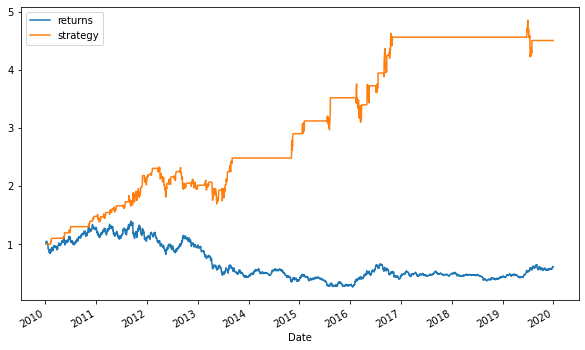

In [17]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch04/mr_plot_3.png')

### Generalizing the Approach 

In [18]:
# Add "utils/" to the path to import some helper functions
import sys
sys.path.append('../utils')

In [19]:
import MRVectorBackTester as MR

In [20]:
mrbt = MR.MRVectorBackTester('GLD', '2010-1-1', '2019-12-31', 10000, 0.001)

In [21]:
mrbt.run_strategy(SMA=43, threshold=7.5)

(13542.15, 646.21)

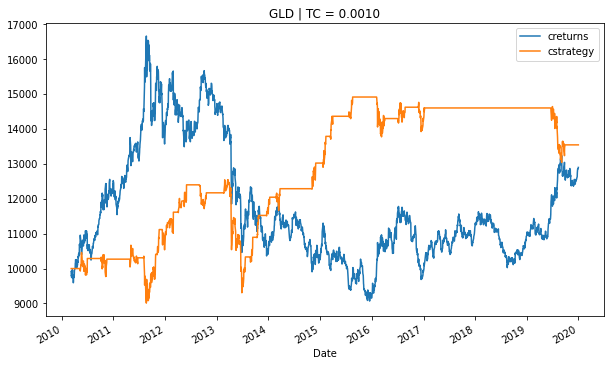

In [22]:
mrbt.plot_results()
# plt.savefig('../../images/ch04/mr_plot_4.png')

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>